# Group - Mann, Keyush, Riddhi & Urvi

Assignment 2 - Classification using Machine Learning - Parkinson's Dataset

- For this task, we will be using the Parkinson's data set composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson’s disease (PD).
- The main aim of the data is to discriminate healthy people from those with PD, according to “status” column which is set to 0 for healthy and 1 for PD. 
- In this assgnment we will propose a software solution to the practical problem using machine learning.
- We will run different ML models on this dataset in order to determine which is the most accurate model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from pathlib import Path
import seaborn as sns
from sklearn import svm
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# importing the data
file = r'~/Downloads/parkinsons.data.csv'

In [3]:
# reading the data into the pandas dataframe
data = pd.read_csv(file)

In [4]:
# lets have a look at the data
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# now we  see the size of the dataset
data.shape

(195, 24)

In [6]:
# lets see the stats of the data based on the status of the patient
data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [7]:
# lets check for null values
data.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [8]:
# lets look at the distribution of the patients with and without Parkinsons
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

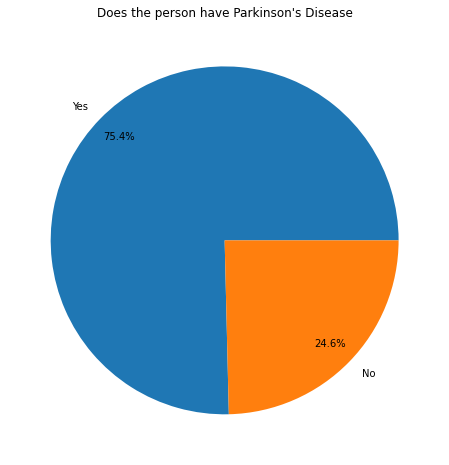

In [9]:
# lets visualize the above numbers
sizes = dict(data['status'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Does the person have Parkinson's Disease")
plt.pie(sizes.values(), labels=['Yes', 'No'], autopct="%.1f%%", pctdistance=0.85)

plt.show()

In [10]:
# lets get some basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [11]:
# Visualising the correlation matrix of the dataset.
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


# Trying the different models

- Prepping the data. This involves splitting the data into two dataframes wherein the fearures are stored in one dataframe and the class value (which is the status in the present case)  is stored in the second datafarame. 
- At this stage we can choose the columns we wish to retain or not, also known as feature extraction. At present we will retain all the columns in our first set except the name column, since that adds no value.
- We will use PCA for feature extraction.
- Since none of the datapoints are non-numerical except name and there arent any null values, we can straightaway move on to preppong put data.

In [12]:
x = data.drop(columns=['name','status'],axis=1)
y = data['status']

# PCA

Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is often used as a dimensionality-reduction technique. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation.

In [13]:
def pca_model_results(x, y, model,comp):
    pca = PCA(n_components=comp)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
    
    print('PCA Explained Variance ratio: ', pca.explained_variance_ratio_)
    
    # fitting the model
    model.fit(X_train, y_train)
    
    # obtaining model predictions from the test data
    y_predicted = model.predict(X_test)
    
     # printing the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n', conf_mat)

PCA - LOGISTIC REGRESSION

In [14]:
model = LogisticRegression()
pca_model_results(x,y,model,3)

PCA Explained Variance ratio:  [0.81122097 0.17174449 0.01269593]
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.81      0.94      0.87        32

    accuracy                           0.77        39
   macro avg       0.41      0.47      0.43        39
weighted avg       0.67      0.77      0.71        39

Confusion matrix:
 [[ 0  7]
 [ 2 30]]


PCA - SUPPORT VECTOR MACHINE

In [16]:
model = svm.SVC(kernel='linear')
pca_model_results(x,y,model,3)   

PCA Explained Variance ratio:  [0.89673508 0.06309073 0.03909989]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.84      1.00      0.91        31

    accuracy                           0.85        39
   macro avg       0.92      0.62      0.66        39
weighted avg       0.87      0.85      0.81        39

Confusion matrix:
 [[ 2  6]
 [ 0 31]]


PCA - DESCISION TREES

In [17]:
model = DecisionTreeClassifier()
pca_model_results(x,y,model,3)  

PCA Explained Variance ratio:  [0.81305267 0.15209314 0.03404978]
Classification report:
               precision    recall  f1-score   support

           0       0.50      0.15      0.24        13
           1       0.69      0.92      0.79        26

    accuracy                           0.67        39
   macro avg       0.59      0.54      0.51        39
weighted avg       0.62      0.67      0.60        39

Confusion matrix:
 [[ 2 11]
 [ 2 24]]


PCA - NAIVE BAYES

In [18]:
m = GaussianNB()
pca_model_results(x,y,model,3) 

PCA Explained Variance ratio:  [0.72603174 0.24548393 0.02612265]
Classification report:
               precision    recall  f1-score   support

           0       0.20      0.07      0.11        14
           1       0.62      0.84      0.71        25

    accuracy                           0.56        39
   macro avg       0.41      0.46      0.41        39
weighted avg       0.47      0.56      0.49        39

Confusion matrix:
 [[ 1 13]
 [ 4 21]]


- We can see from the above output that the PCA is working all right, however, PCA does not allow us any control over the choice of features only the number of components. 
- PCA seems to be doing well on some models but is pretty inaccurate for most.
- We will next use different machine learning models using all the features, since thre are only 23 features and the data is pretty cleaned. 

#    ML MODELS without PCA

We create a function to fit our data into the required models, perform the predictions and give us a confusion matrix as output. We will call this function using different models. We will also have a second function with the random state set as 42 for our train test split so that we have consistent outputs and are better able to compare the different models.

In [19]:
def get_model_results(x, y, model, ts):
    
    # splitting the set
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=ts)
    
    # fitting the model
    model.fit(X_train, y_train)
    
    # obtaining model predictions from the test data
    y_predicted = model.predict(X_test)
    
    # comparing y_test to predictions and obtaining performance metrics
    # printing the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n', conf_mat)
    
    # checking the accuracy of our model
    print(f'Accuracy Score:\n{accuracy_score(y_test, y_predicted):0.3f}')
    
    # getting AUC score
    probs = model.predict_proba(X_test)
    
    print(f'AUC:\n{roc_auc_score(y_test,probs[:,1])}')
    
    # printing the ROC curve
    
    print('ROC:\n')
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    

# Logistic Regression

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.90      1.00      0.95        28

    accuracy                           0.92        39
   macro avg       0.95      0.86      0.90        39
weighted avg       0.93      0.92      0.92        39

Confusion matrix:
 [[ 8  3]
 [ 0 28]]
Accuracy Score:
0.923
AUC:
0.9318181818181819
ROC:



/Users/urvivaidya/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


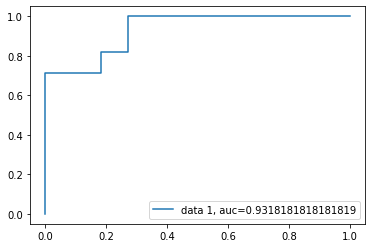

In [20]:
# defining the logistic regression model
m = LogisticRegression()

# calling our function
get_model_results(x,y,m,0.2)

# KNeighbors Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39

Confusion matrix:
 [[ 5  2]
 [ 2 30]]
Accuracy Score:
0.897
AUC:
0.8794642857142857
ROC:



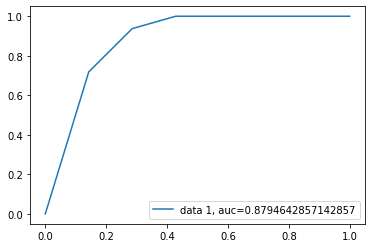

In [22]:
# defining the KNeighbirs model
m = KNeighborsClassifier(n_neighbors = 3)

# calling our function
get_model_results(x,y,m,0.2)

# Ada Boost Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.89      0.80      0.84        30

    accuracy                           0.77        39
   macro avg       0.69      0.73      0.71        39
weighted avg       0.80      0.77      0.78        39

Confusion matrix:
 [[ 6  3]
 [ 6 24]]
Accuracy Score:
0.769
AUC:
0.9074074074074074
ROC:



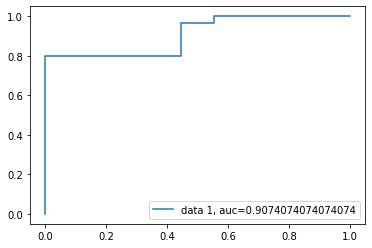

In [23]:
# defining the Ada Boost Classifier
m = AdaBoostClassifier(base_estimator = None)

# calling our function
get_model_results(x,y,m,0.2)

# Naive Bayes

Classification report:
               precision    recall  f1-score   support

           0       0.40      0.80      0.53        10
           1       0.89      0.59      0.71        29

    accuracy                           0.64        39
   macro avg       0.65      0.69      0.62        39
weighted avg       0.77      0.64      0.66        39

Confusion matrix:
 [[ 8  2]
 [12 17]]
Accuracy Score:
0.641
AUC:
0.7637931034482759
ROC:



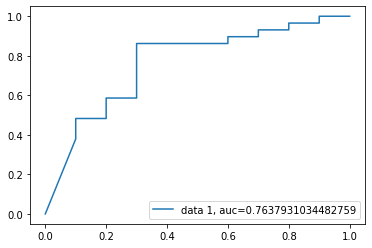

In [24]:
# defining the Naive Bayes Classifier
m = GaussianNB()

# calling our function
get_model_results(x,y,m,0.2)

# Descision Tree

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39

Confusion matrix:
 [[ 8  2]
 [ 0 29]]
Accuracy Score:
0.949
AUC:
0.9
ROC:



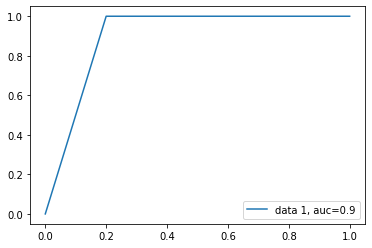

In [25]:
# defining the descision tree model
m = DecisionTreeClassifier()

# calling our function
get_model_results(x,y,m,0.2)

# Random Forests

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.83      0.96      0.89        25

    accuracy                           0.85        39
   macro avg       0.86      0.80      0.82        39
weighted avg       0.85      0.85      0.84        39

Confusion matrix:
 [[ 9  5]
 [ 1 24]]
Accuracy Score:
0.846
AUC:
0.8014285714285714
ROC:



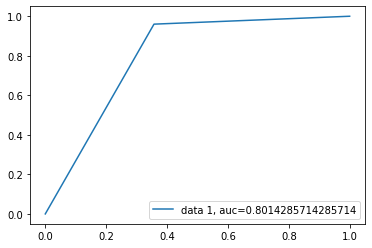

In [26]:
# defining the random forests model
model = RandomForestClassifier()

# calling our function
get_model_results(x,y,m,0.2)

# Random Forests with n_estimator

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.94      0.88      0.91        33

    accuracy                           0.85        39
   macro avg       0.72      0.77      0.74        39
weighted avg       0.87      0.85      0.85        39

Confusion matrix:
 [[ 4  2]
 [ 4 29]]
Accuracy Score:
0.846
AUC:
0.7727272727272729
ROC:



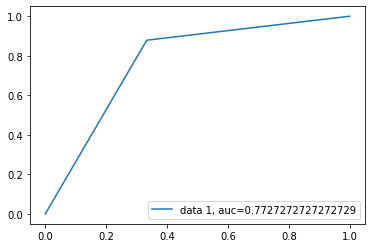

In [27]:
# defining the random forests model with n_estimators
model = RandomForestClassifier(n_estimators = 10)

# calling our function
get_model_results(x,y,m,0.2)

# Random Forests with model options

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.83      1.00      0.91        30

    accuracy                           0.85        39
   macro avg       0.92      0.67      0.70        39
weighted avg       0.87      0.85      0.81        39

Confusion matrix:
 [[ 3  6]
 [ 0 30]]
Accuracy Score:
0.846
AUC:
0.874074074074074
ROC:



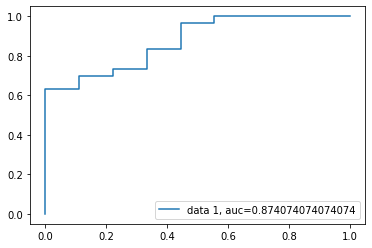

In [28]:
# Change the model options
m = RandomForestClassifier(bootstrap=True,
class_weight={0:1, 1:12},
criterion='entropy',
max_depth=10,
min_samples_leaf=10,
n_estimators=20,
n_jobs=-1)

# calling the function
get_model_results(x,y,m,0.2)

# Final Code - CHOOSING THE BEST MODEL

- Looking at the above outputs, we can safely choose Descision Tree Classifier as our final model since it has the highest accuracy score. 
- Although most of our models are doing pretty well with detecting the Positive patients, the Negative patients are not being correctly diagnosed. 
- In addition to the overall accuracy the f1- scores of both the Negative and Positive results are very high too. 
- These numbers are closely followed by Logistic Regression as our second best model.
- Overall Descision Tree Classifier has given us the best results. 
- The Descision Tree code is reproduced hereinbelow for easy reference.

Classification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.94      0.97        32

    accuracy                           0.95        39
   macro avg       0.89      0.97      0.92        39
weighted avg       0.96      0.95      0.95        39

Confusion matrix:
 [[ 7  0]
 [ 2 30]]
Accuracy Score:
0.949
AUC:
0.96875
ROC:



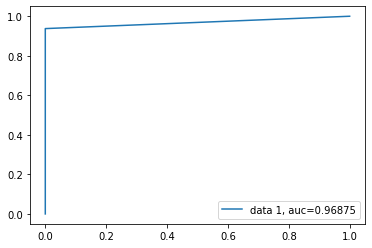

In [29]:
# defining the descision tree model
m = DecisionTreeClassifier()

# calling our function
get_model_results(x,y,m,0.2)